In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [3]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')
data.dropna().describe()

,West,East,Total
count,35752.000000,35752.000000,35752.000000
mean,61.470267,54.410774,115.881042
std,82.588484,77.659796,145.392385
min,0.000000,0.000000,0.000000
25%,8.000000,7.000000,16.000000
50%,33.000000,28.000000,65.000000
75%,79.000000,67.000000,151.000000
max,825.000000,717.000000,1186.000000


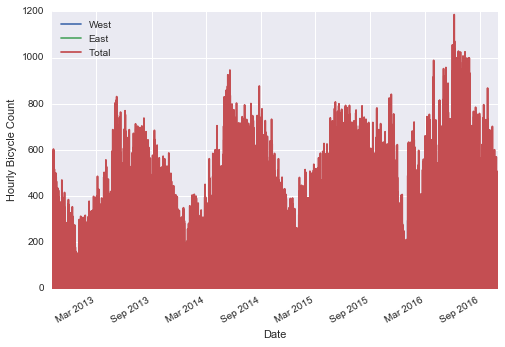

In [4]:
sns.set()
data.plot()
plt.ylabel('Hourly Bicycle Count')

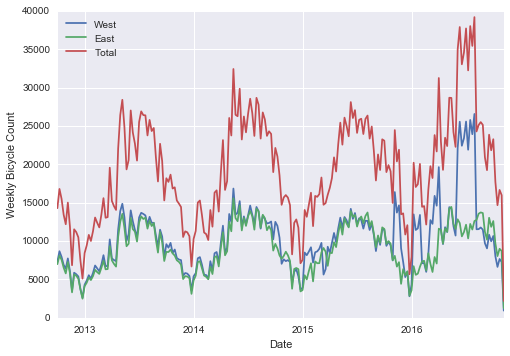

In [5]:
data.resample('W').sum().plot()
plt.ylabel('Weekly Bicycle Count');

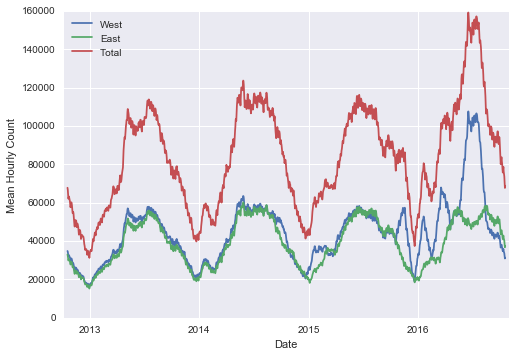

In [6]:
daily = data.resample('D').sum()
daily.rolling(window=30, center=True).sum().plot()
plt.ylabel('Mean Hourly Count');

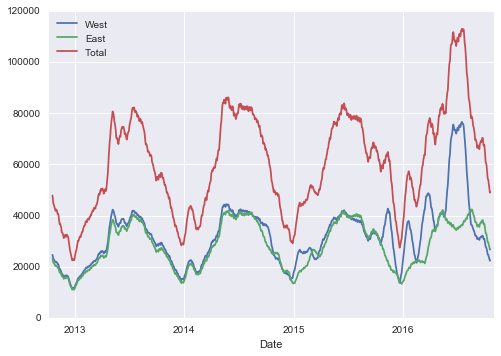

In [7]:
#smooth it out
daily.rolling(window=30, center=True, win_type='gaussian').sum(std=10).plot();

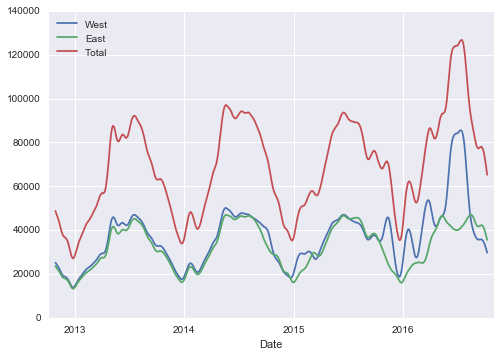

In [8]:
daily.rolling(window=50, center=True, win_type='gaussian').sum(std=10).plot();

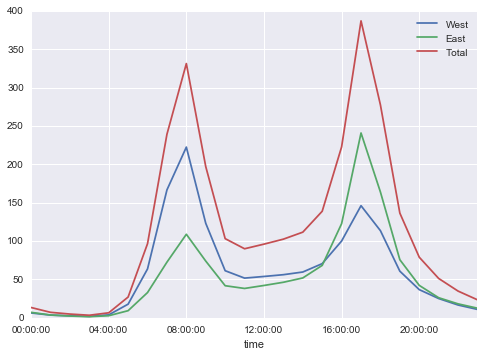

In [9]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks);

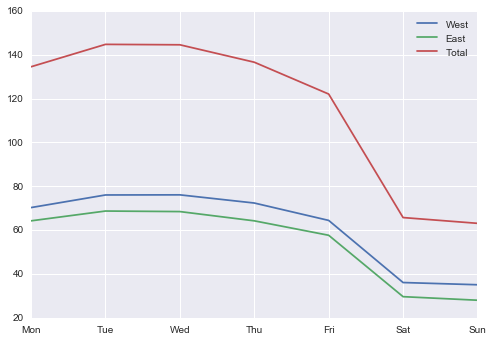

In [10]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_weekday.plot();

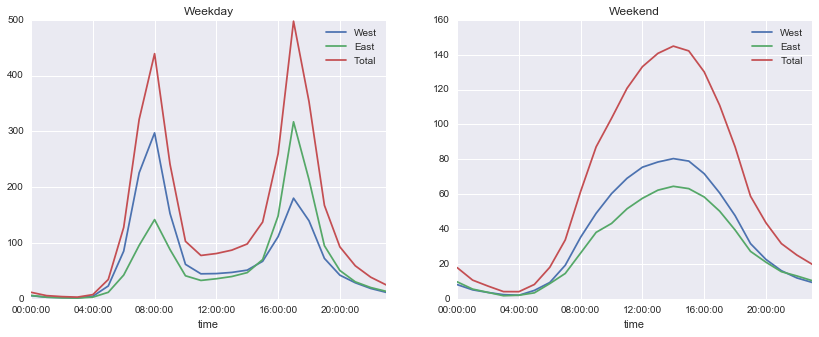

In [11]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekday', xticks=hourly_ticks)
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekend', xticks=hourly_ticks);